In [40]:
# import modules
from specutils import Spectrum1D
from specutils.fitting import fit_generic_continuum
from specutils import SpectralRegion

from matplotlib import pyplot as plt
%matplotlib notebook

import numpy as np

from astropy.io import fits
from astropy import units as u

In [5]:
infile = "M57_20211109_final.fits"

M57spec = Spectrum1D.read(infile,unit=u.adu)

Text(0.5, 1.0, 'LISA Spectrum of M57')

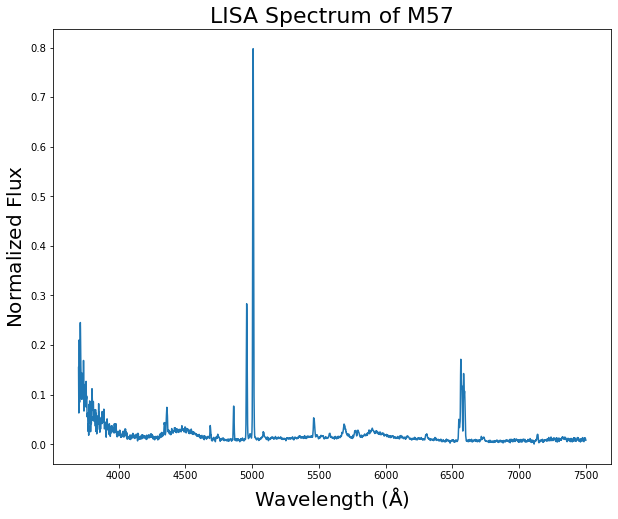

In [6]:
# plot spectrum 

plt.figure(figsize=(10,8))
plt.plot(M57spec.wavelength,M57spec.flux)
plt.xlabel(r'$\rm Wavelength \ (\AA)$',fontsize=20)
plt.ylabel(r'$\rm Normalized \ Flux$',fontsize=20)
plt.title('LISA Spectrum of M57',fontsize=22)

## Fit Continuum

In [41]:
from astropy.modeling import models, fitting
#from astropy.modeling.models import Spline1D
#from astropy.modeling.fitting import (SplineInterpolateFitter,SplineSmoothingFitter,SplineExactKnotsFitter)

In [43]:
models

<module 'astropy.modeling.models' from '/Users/rfinn/anaconda3/lib/python3.8/site-packages/astropy/modeling/models.py'>

TypeError: 'module' object is not callable

In [20]:
# define regions to ignore when fitting continuum

test = [SpectralRegion(3700 * u.AA, 4000 * u.AA), 
        SpectralRegion(4825 * u.AA, 4885 * u.AA), 
        SpectralRegion(4900 * u.AA, 5100 * u.AA),
        SpectralRegion(6520 * u.AA, 6540 * u.AA)]

In [21]:
contFit = fit_generic_continuum(M57spec,exclude_regions=test)
ycontFit = contFit(M57spec.wavelength)

In [24]:
help(fit_generic_continuum)

Help on function fit_generic_continuum in module specutils.fitting.continuum:

fit_generic_continuum(spectrum, median_window=3, model=<Chebyshev1D(3, c0=0., c1=0., c2=0., c3=0.)>, fitter=<astropy.modeling.fitting.LevMarLSQFitter object at 0x7ff628a6e8b0>, exclude_regions=None, weights=None)
    Basic fitting of the continuum of an input spectrum. The input
    spectrum is smoothed using a median filter to remove the spikes.
    
    Parameters
    ----------
    spectrum : Spectrum1D
        The spectrum object overwhich the equivalent width will be calculated.
    model : list of `~astropy.modeling.Model`
        The list of models that contain the initial guess.
    median_window : float
        The width of the median smoothing kernel used to filter the data before
        fitting the continuum. See the ``kernel_size`` parameter of
        `~scipy.signal.medfilt` for more information.
    fitter : `~astropy.fitting._FitterMeta`
        The astropy fitter to use for fitting the model

Text(0.5, 1.0, 'LISA Spectrum of M57')

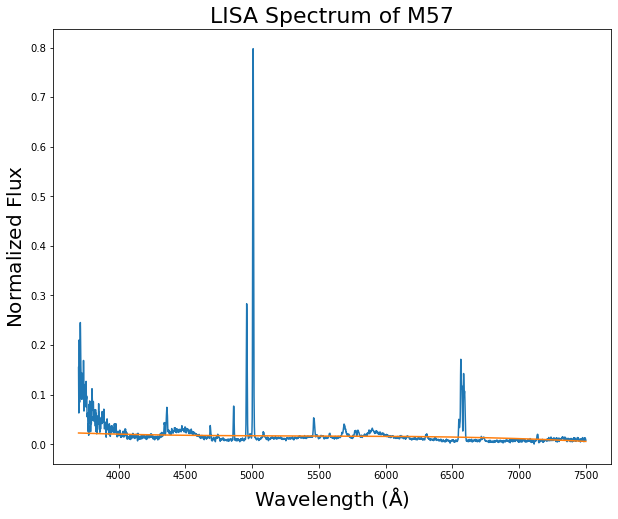

In [22]:
plt.figure(figsize=(10,8))
plt.plot(M57spec.wavelength,M57spec.flux)
plt.plot(M57spec.wavelength,ycontFit)
plt.xlabel(r'$\rm Wavelength \ (\AA)$',fontsize=20)
plt.ylabel(r'$\rm Normalized \ Flux$',fontsize=20)
plt.title('LISA Spectrum of M57',fontsize=22)

## Identify Lines in the Spectrum

In [17]:
from specutils.fitting import find_lines_derivative

lines = find_lines_derivative(M57spec,flux_threshold=0.1)


If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]


In [29]:
lines

line_center,line_type,line_center_index
Angstrom,,
float64,str8,int64
3705.1619649895474,emission,12
3712.837980856146,emission,30
3720.9404420486667,emission,49
3724.3520046560434,emission,57
3732.8809111744863,emission,77
3736.7189191077855,emission,86
3742.2627083447733,emission,99
3747.380052255839,emission,111


In [30]:
lines['line_center']

<Quantity [3705.16196499, 3712.83798086, 3720.94044205, 3724.35200466,
           3732.88091117, 3736.71891911, 3742.26270834, 3747.38005226,
           3756.3354041 , 3800.685718  , 4958.9112232 , 5007.09954503,
           6562.77209399, 6570.44810986, 6583.66791496, 6590.9174855 ] Angstrom>

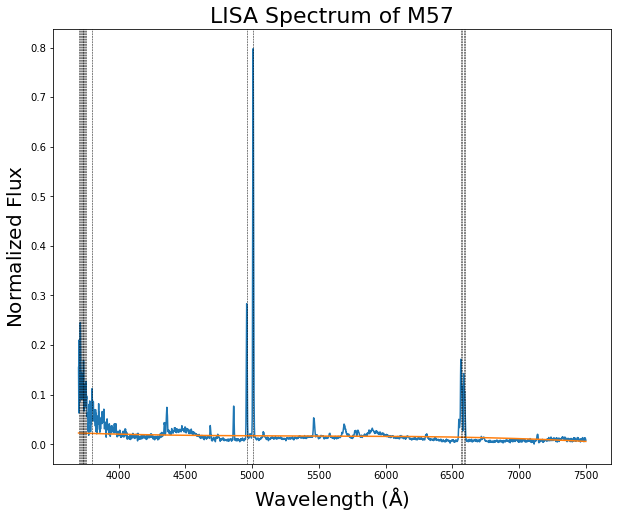

In [37]:
plt.figure(figsize=(10,8))
plt.plot(M57spec.wavelength,M57spec.flux)
plt.plot(M57spec.wavelength,ycontFit)
plt.xlabel(r'$\rm Wavelength \ (\AA)$',fontsize=20)
plt.ylabel(r'$\rm Normalized \ Flux$',fontsize=20)
plt.title('LISA Spectrum of M57',fontsize=22)
for l in lines['line_center']:
    plt.axvline(x=l.value,ls='--',c='k',lw=0.5)